# Predict Sentiment From Movie Reviews
Deep Learning with Python: Jason Brownlee, Page 169-175
https://machinelearningmastery.com/predict-sentiment-movie-reviews-using-deep-learning/

In [ ]:
Movie Review Sentiment Classification Dataset

# Load the IMDB Dataset With Keras

Training data: 
(50000,)
(50000,)
Classes: 
[0 1]
Number of words: 
88585
Review length: 
Mean 234.76 words (172.911495)


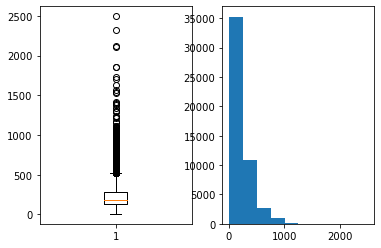

In [3]:
# Load and Plot the IMDB dataset
import numpy as np
from tensorflow.keras.datasets import imdb
from matplotlib import pyplot

# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

# summarize size
print("Training data: ")
print(X.shape)
print(y.shape)

# Summarize number of classes
print("Classes: ")
print(numpy.unique(y))

# Summarize number of words
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))


# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))


# plot review length as a boxplot and histogram
pyplot.subplot(121)
pyplot.boxplot(result)
pyplot.subplot(122)
pyplot.hist(result)
pyplot.show()

# Word Embeddings

# Simple Multi-Layer Perceptron Model for the IMDB Dataset

In [4]:
# MLP for the IMDB problem
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 250)               4000250   
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
196/196 - 19s - loss: 0.4614 - accuracy: 0.7583 - val_loss: 0.3073 - val_accuracy: 0.8696 - 19s/epoch - 98ms/step
Epoch 2/2
196/196 - 15s - loss: 0.1766 - accuracy: 0.9

In [6]:
# MLP for the IMDB problem with larger embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 7000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           224000    
                                                                 
 flatten_2 (Flatten)         (None, 16000)             0         
                                                                 
 dense_4 (Dense)             (None, 250)               4000250   
                                                                 
 dense_5 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4,224,501
Trainable params: 4,224,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
196/196 - 11s - loss: 0.5327 - accuracy: 0.6870 - val_loss: 0.3008 - val_accuracy: 0.8719 - 11s/epoch - 57ms/step
Epoch 2/2
196/196 - 9s - loss: 0.1902 - accuracy: 0.

In [7]:
import time
from datetime import timedelta

start_time = time.time()


# MLP for the IMDB problem with larger embedding and more hidden layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

elapsed_time_secs = time.time() - start_time

msg = "Execution (importing modules) took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print(msg)  
print("\n\n")



start_time = time.time()

# load the dataset but only keep the top n words, zero the rest
top_words = 7000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))



elapsed_time_secs = time.time() - start_time

msg = "Execution of the model took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print(msg)  

Execution (importing modules) took: 0:00:00 secs (Wall clock time)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           224000    
                                                                 
 flatten_3 (Flatten)         (None, 16000)             0         
                                                                 
 dense_6 (Dense)             (None, 1000)              16001000  
                                                                 
 dense_7 (Dense)             (None, 500)               500500    
                                                                 
 dense_8 (Dense)             (None, 250)               125250    
                                                                 
 dense_9 (Dense)             (None, 125)               31375     
                                                  

In [ ]:
One-Dimensional Convolutional Neural Network Model for the IMDB Dataset

In [9]:
import time
from datetime import timedelta

start_time = time.time()


# CNN for the IMDB problem
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print("\n\n")
print(msg)  
print("\n\n")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 500, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 32)          0         
 )                                                               
                                                                 
 flatten_4 (Flatten)         (None, 8000)              0         
                                                                 
 dense_11 (Dense)            (None, 250)               2000250   
                                                                 
 dense_12 (Dense)            (None, 1)                 251       
                                                      

In [ ]:
Edit: Execution of the model took: 0:01:19 secs (Wall clock time)